## Introduction
For the modeling of implied volatility surface, there are three most common models. 

The first is the deterministic volatility model, which is also the first model proposed. This model believes that the implied volatility surface has a certain functional relationship with the degree of value (or exercise price) of options, and the remaining maturity time. It is assumed that the shape of the implied volatility surface will not change with time.

However, volatility, as a complex variable in options, is difficult to accurately describe it with an unchanging static function. Scholars have begun to study the second mainstream model, and random volatility model has emerged as the times require. The random volatility model considers that the change of implied volatility is likely to be a random change process.

Compared with complex models, parametric models are simple, easy to operate, fast in calculation, and widely used. Moreover, some parametric models have very good performance in the non arbitrage nature of volatility surfaces.

SVI is an exact solution for the implied variance in the Heston
model in the limit as T goes to infinity, thus providing a direct interpretation of the SVI parameters in terms of the
parameters of the Heston model.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import scipy as sp
import pyfeng as pf
from pyfeng import sabr

In [5]:
k = np.arange(1/np.e, np.e, 0.1)
T = texp = 1
fwd = 100
strike = k * fwd
k = np.log(k)

$$
\operatorname{var}(k ; a, b, \sigma, \rho, m)=a+b\left\{\rho(k-m)+\sqrt{(k-m)^2+\sigma^2}\right\}
$$

In [6]:
class SVI(sabr.SabrVolApproxABC):
    def __init__(self, k, a, b, sigma, rho, m, T):
        self.k = k
        self.a = a
        self.b = b
        self.sigma = sigma
        self.rho = rho
        self.m = m
        self.T = T
            
    def var(k, a=0.04, b=0.4, sigma=0.1, rho=-0.4, m=0):
        var = a + b * (rho * (k - m) + np.sqrt((k - m)**2 + sigma**2))
        return var
    
    @classmethod
    def init_from_heston(cls, sigma=0.04, vov=0.8, rho=-0.7, mr=0.5, theta=0.04, intr = 0.03):
        x = np.sqrt((2 * mr - rho * sigma)**2 + sigma**2 * (1 - rho**2)) - (2 * mr - rho * sigma)
        y = (4 * mr * theta) / (sigma**2 * (1 - rho**2))
        w1 = x * y
        w2 = sigma / (mr * theta)
        a = (w1 * (1 - rho**2)) / 2
        b = (w1 * w2) / (2 * T)
        m = (-1 * rho * T) / w2
        rho_tilde = rho
        sigma_tilde = (np.sqrt(1 - rho**2) * T) / w2
        var = np.sqrt(cls.var(k, a, b, sigma_tilde, rho_tilde, m))
        return var

## what the SVI parameters mean
a gives the overall level of variance.
b gives the angele between the left and right asymptotes.
sigma determines how smooth the vertex is.
rho determines the orientation of the graph.
changing m translates the graph.

Text(0, 0.5, 'Implied volatility')

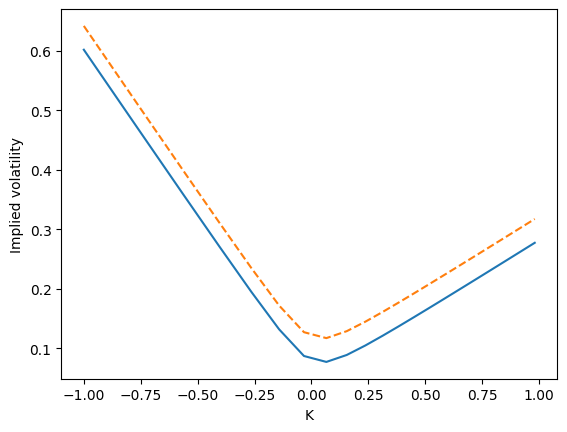

In [9]:
x = SVI.var(k = k, a = 0.04)
y = SVI.var(k = k, a = 0.08)
bsm1 = pf.Bsm(x)
svi1 = bsm1.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
bsm2 = pf.Bsm(y)
svi2 = bsm2.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
plt.plot(k, svi1, '-')
plt.plot(k, svi2, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')

Text(0, 0.5, 'Implied volatility')

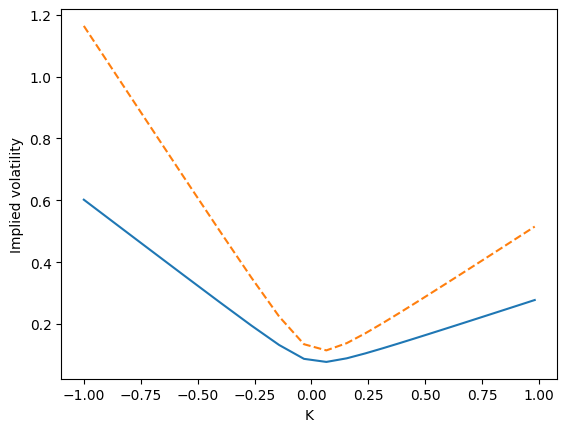

In [10]:
x = SVI.var(k = k, b = 0.4)
y = SVI.var(k = k, b = 0.8)
bsm1 = pf.Bsm(x)
svi1 = bsm1.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
bsm2 = pf.Bsm(y)
svi2 = bsm2.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
plt.plot(k, svi1, '-')
plt.plot(k, svi2, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')

Text(0, 0.5, 'Implied volatility')

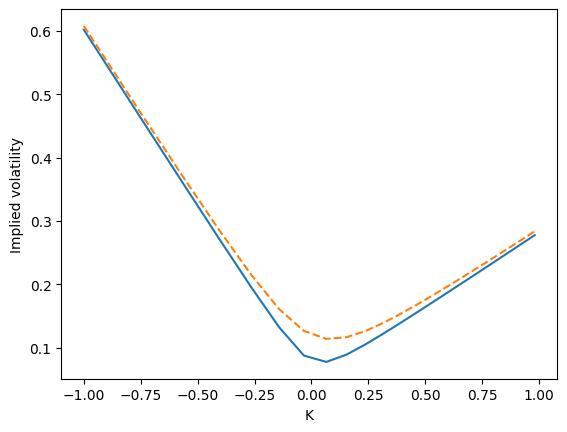

In [11]:
x = SVI.var(k = k, sigma = 0.1)
y = SVI.var(k = k, sigma = 0.2)
bsm1 = pf.Bsm(x)
svi1 = bsm1.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
bsm2 = pf.Bsm(y)
svi2 = bsm2.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
plt.plot(k, svi1, '-')
plt.plot(k, svi2, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')

Text(0, 0.5, 'Implied volatility')

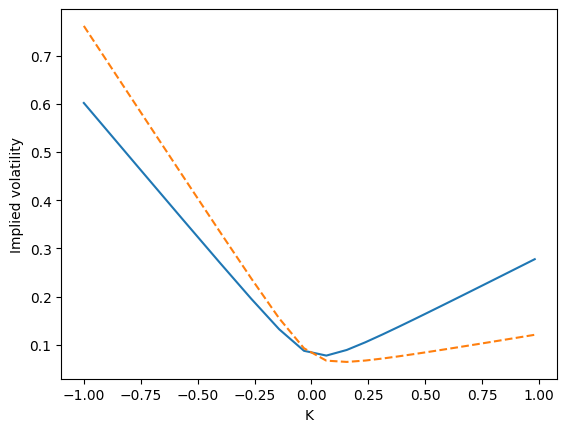

In [12]:
x = SVI.var(k = k, rho = -0.4)
y = SVI.var(k = k, rho = -0.8)
bsm1 = pf.Bsm(x)
svi1 = bsm1.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
bsm2 = pf.Bsm(y)
svi2 = bsm2.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
plt.plot(k, svi1, '-')
plt.plot(k, svi2, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')

Text(0, 0.5, 'Implied volatility')

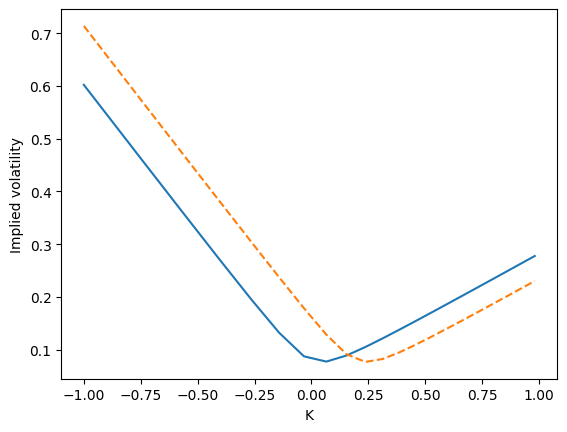

In [13]:
x = SVI.var(k = k, m = 0)
y = SVI.var(k = k, m = 0.2)
bsm1 = pf.Bsm(x)
svi1 = bsm1.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
bsm2 = pf.Bsm(y)
svi2 = bsm2.vol_smile(strike, fwd, texp, model='bsm', cp = -1)
plt.plot(k, svi1, '-')
plt.plot(k, svi2, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')

In [14]:
spot = 1
dt = 1/52
n_dt = int(texp/dt)
sigma=0.04
vov=0.2
rho=-0.7
mr=0.5
theta=0.04
intr=0
T = texp = 1

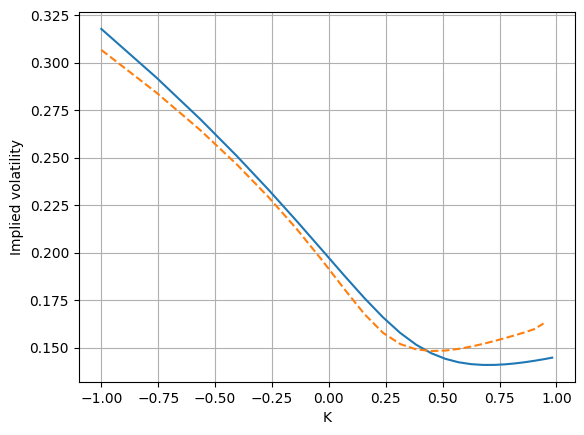

In [15]:
m0 = pf.HestonFft(sigma, vov, rho, mr, theta, intr)
vol = m0.vol_smile(np.exp(k), spot, texp, cp = -1)
var = SVI.init_from_heston()
plt.plot(k, var, '-')
plt.plot(k, vol, '--')
plt.xlabel('K')
plt.ylabel('Implied volatility')
plt.grid()